In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
base_dir = os.path.expanduser('~') + '/leapTracker/datafiles/direction'
filename = os.path.join(base_dir, 'final_training_data.pkl')
train_data = pickle.load(open(filename, 'rb'))

In [3]:
X = train_data['firing']
y = train_data['directions']
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (104, 50)
y shape: (104,)


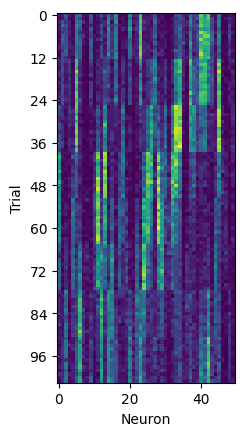

In [4]:
plt.imshow(X)
plt.xlabel('Neuron')
plt.ylabel('Trial')
plt.yticks(np.arange(0,104, 12))
plt.show()

In [85]:
model = LinearDiscriminantAnalysis()
cv = RepeatedKFold(n_splits=10, n_repeats=10, 
                             random_state=np.random.randint(0,1000))
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: {0:.3f} ({1:.3f})'.format(np.mean(scores),
                                                np.std(scores)))

Mean Accuracy: 0.990 (0.030)


In [86]:
model.fit(X, y)

LinearDiscriminantAnalysis()

In [87]:
f = open(os.path.join(base_dir, 'lda_classifier.mdl'), 'wb')
pickle.dump(model, f)
f.close()